In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx
network = networkx.generators.barabasi_albert_graph(1000, 5)
network2 = networkx.generators.watts_strogatz_graph(1000, 10, 0.1)
print network.number_of_edges()
print network2.number_of_edges()

4975
5000


In [6]:
import random
INFECTED = 1
NOT_INFECTED = 0

# initialization
def initialization(network, d):
    for node in network.nodes():
        network.node[node]['infected'] = NOT_INFECTED
# start with fraction of nodes being infected
    amtInfected = int(d * network.number_of_nodes())
    for i in range(amtInfected):
        x = random.choice(network.nodes())
        network.node[x]['infected'] = INFECTED
    return amtInfected

# tn each time step: determine state transition based on prev state
def update_network(network, p, p2, num_infections):
    for node in network.nodes():
        if network.node[node]['infected'] is INFECTED:
            for n in network.neighbors(node):
                # and infect them w prob p
                if network.node[n]['infected'] is NOT_INFECTED:
                    x = random.random()
                    if x < p:
                    # infect, check by if p is 1.0, it is always true
                        network.node[n]['infected'] = INFECTED
                        num_infections += 1
            y = random.random()
            if y < p2:
                network.node[node]['infected'] = NOT_INFECTED
                num_infections -= 1
    return num_infections


In [7]:
ps = [0.0, .01, .02, .03, .04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, .45, .5, .55, .6]

In [8]:
#BA
d = 0.001

p2 = .1

amtInf = initialization(network, d)
total = []

for j in range(len(ps)):
    networkcopy = network.copy()
    p = ps[j]
    num_infections = 1
    for i in range(1000):
        num_infections = update_network(networkcopy, p, p2, num_infections)
    density = float(num_infections) / float(network.number_of_nodes())
    total.append(density)
    
len(total)

17

In [9]:
#WS
d = 0.001

p2 = .1

amtInf = initialization(network2, d)
total2 = []
num_infections2 = 1

for j in range(len(ps)):
    network2copy = network2.copy()
    p = ps[j]
    num_infections2 = 1
    for i in range(1000):
        num_infections2 = update_network(network2copy, p, p2, num_infections2)
    density2 = float(num_infections2) / float(network2.number_of_nodes())
    total2.append(density2)
    
len(total2)

17

<function matplotlib.pyplot.show>

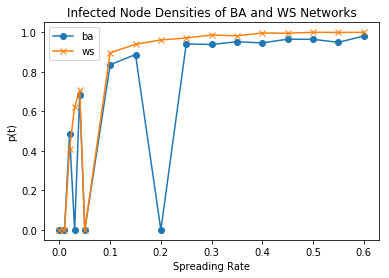

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ps, total, '-o', label='BA')
plt.plot(ps, total2, '-x', label='WS')
plt.xlabel('Spreading Rate')
plt.ylabel('p(t)')
plt.legend(['ba', 'ws'])
plt.title('Infected Node Densities of BA and WS Networks')
plt.show